In [1]:
!pip install --quiet shapely==2.0.0 scipy==1.9.3 watermark

In [2]:
from watermark import watermark

print(watermark())


Last updated: 2022-12-30T15:52:06.391561-05:00

Python implementation: CPython
Python version       : 3.8.15
IPython version      : 8.7.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 21.2.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [3]:
from scipy.spatial import Voronoi
from voronoiville import voronoi, BoundingBox
import shapely.geometry as geo
import numpy as np
from shapely.ops import polygonize
from IPython.display import SVG


In [4]:
points = np.random.random(size=(50, 2)) * 100
points_list = list(map(tuple, points.tolist()))


In [5]:
bounding_box_shape = geo.box(0, 0, 100, 100)

# This is a hack, otherwise it returns -1 for vertices with an "infinite" endpoint
cardinal_bounds =  [(-10000, -10000), ( 10000, -10000), (10000, 10000), (-10000, 10000)]
v = Voronoi(points_list + cardinal_bounds)
lines = polygonize([
    geo.LineString(v.vertices[line])
    for line in v.ridge_vertices if -1 not in line
])

result = geo.GeometryCollection([p.intersection(bounding_box_shape) for p in lines])


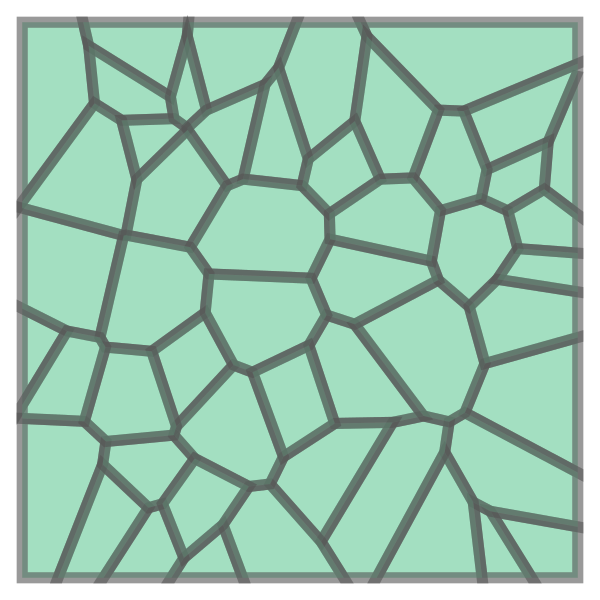

In [6]:
# scipy doesn't have a nice way to get these boundaries in a way that makes sense
SVG(
    result._repr_svg_().replace(
        'width="108.0" height="108.0"', 'width="600.0" height="600.0"'
    )
)


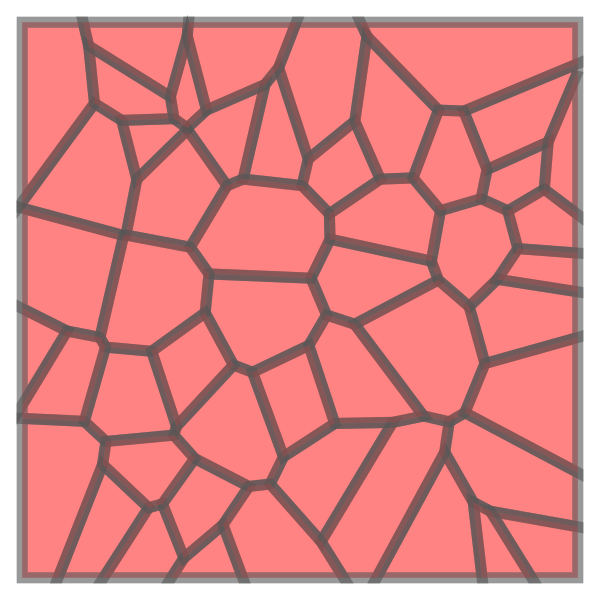

In [7]:
vville_voronoi =  voronoi(points_list, BoundingBox(0, 0, 100, 100))
vville_voronoi_polygons = geo.MultiPolygon([geo.Polygon(cell.vertices) for cell in vville_voronoi])
SVG(vville_voronoi_polygons._repr_svg_().replace('width="108.0" height="108.0"', 'width="600.0" height="600.0"'))